In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv("processed_df/bet_event_df.csv")

In [14]:
df = df.drop(['away_team_x', 'home_team_x', 'publishTime', 'sub_event_name', 'team_caused_event', 'event_name', 'winner', 'match_period', 'positions', 'tags', 'match_id_y', "player_id", 'team_id', 'date', 'match_name_x', 'home_team_id', 'away_team_id', 'marketId', 'selection_selectionId',
       'selection_lastPriceTraded', 'match_name_y', 'team_name', 'home_team_y', 'away_team_y'], axis = 1)

df = df.rename(columns = {'match_id_x':'match_id'})
df = data

# Basic Statistics

### Correlation Matrix

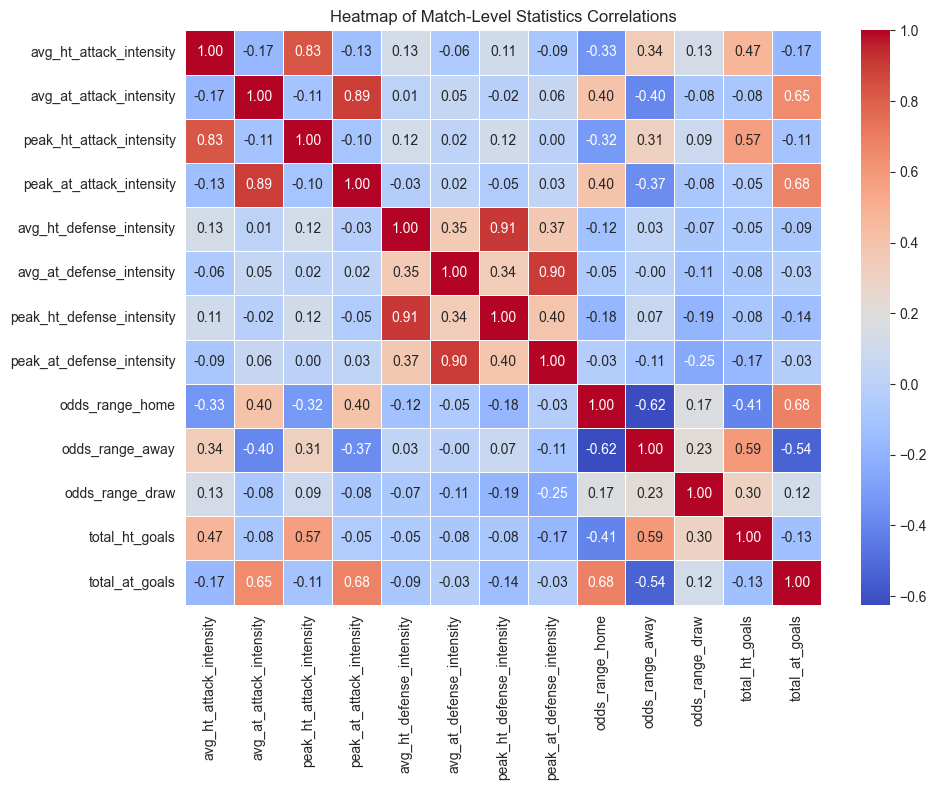

In [167]:
# Modify the groupby operation to also capture the last row (for total goals scored by each team)
match_stats = data.groupby('match_id').apply(lambda x: pd.Series({
    'avg_ht_attack_intensity': x['ht_attack_intensity'].mean(),
    'avg_at_attack_intensity': x['at_attack_intensity'].mean(),
    'peak_ht_attack_intensity': x['ht_attack_intensity'].max(),
    'peak_at_attack_intensity': x['at_attack_intensity'].max(),
    'avg_ht_defense_intensity': x['ht_defense_intensity'].mean(),
    'avg_at_defense_intensity': x['at_defense_intensity'].mean(),
    'peak_ht_defense_intensity': x['ht_defense_intensity'].max(),
    'peak_at_defense_intensity': x['at_defense_intensity'].max(),
    'odds_range_home': x['home_price'].max() - x['home_price'].min(),
    'odds_range_away': x['away_price'].max() - x['away_price'].min(),
    'odds_range_draw': x['draw_price'].max() - x['draw_price'].min(),
    'total_ht_goals': x.iloc[-1]['ht_goals'],  # Capturing total home team goals from the last row
    'total_at_goals': x.iloc[-1]['at_goals'],  # Capturing total away team goals from the last row
    # Add more statistics as needed
}))

# Proceed with aggregation and correlation analysis as before
# Step 2: Aggregate Statistics Across Matches (example)
overall_avg_ht_attack_intensity = match_stats['avg_ht_attack_intensity'].mean()
overall_avg_at_attack_intensity = match_stats['avg_at_attack_intensity'].mean()

# Step 3: Correlation Analysis (example)
correlations = match_stats.corr()

# Generate heatmap based on 'correlations'
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap of Match-Level Statistics Correlations')
plt.tight_layout()
plt.savefig('data_analysis/corr_heat.png')
plt.show()


In [18]:
# First, sort the data by match_id and event_sec to ensure it's in chronological order
sorted_data = data.sort_values(by=['match_id', 'event_sec'])

# Now, group by match_id and take the last row for each group to get the final event of each match
final_state_data = sorted_data.groupby('match_id').last().reset_index()

# We can add an outcome column to categorize matches into home win, away win, or draw
final_state_data['outcome'] = final_state_data.apply(lambda row: 'home_win' if row['home_winner'] == 1 else ('away_win' if row['away_winner'] == 1 else 'draw'), axis=1)

# Calculate descriptive statistics for the final state based on the outcome
final_state_stats = final_state_data.groupby('outcome').describe()

final_state_stats.transpose()


outcome               away_win          draw      home_win
match_id   count  4.800000e+01  4.900000e+01  8.100000e+01
           mean   2.499857e+06  2.499895e+06  2.499897e+06
           std    1.146936e+02  9.890252e+01  1.157436e+02
           min    2.499721e+06  2.499727e+06  2.499719e+06
           25%    2.499766e+06  2.499795e+06  2.499799e+06
...                        ...           ...           ...
draw_price min    1.080000e+00  1.010000e+00  1.180000e+00
           25%    1.937500e+01  1.060000e+00  3.400000e+01
           50%    1.300000e+02  1.080000e+00  1.200000e+02
           75%    1.000000e+03  1.110000e+00  1.000000e+03
           max    1.000000e+03  2.900000e+01  1.000000e+03

[192 rows x 3 columns]

### Win/Loose Frequency

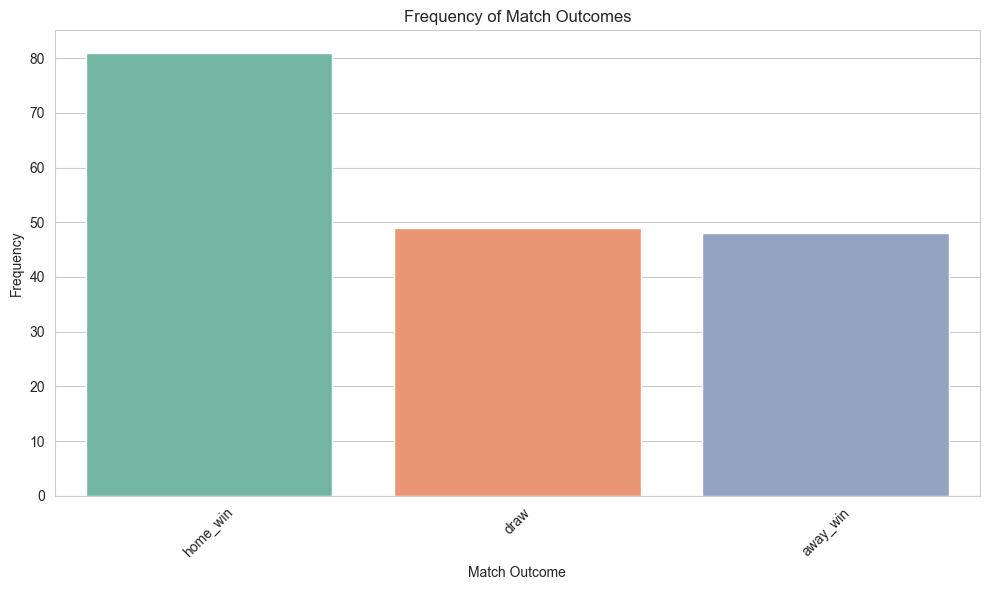

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Prepare the dataset for plotting
outcome_counts = final_state_data['outcome'].value_counts().reset_index()
outcome_counts.columns = ['Outcome', 'Count']

# Plotting Outcome Frequencies
plt.figure(figsize=(10, 6))
sns.barplot(x='Outcome', y='Count', data=outcome_counts, palette='Set2')
plt.title('Frequency of Match Outcomes')
plt.xlabel('Match Outcome')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('data_analysis/freq_match_outcome.png')
plt.show()

### Attack/Defense Intensity Distribution

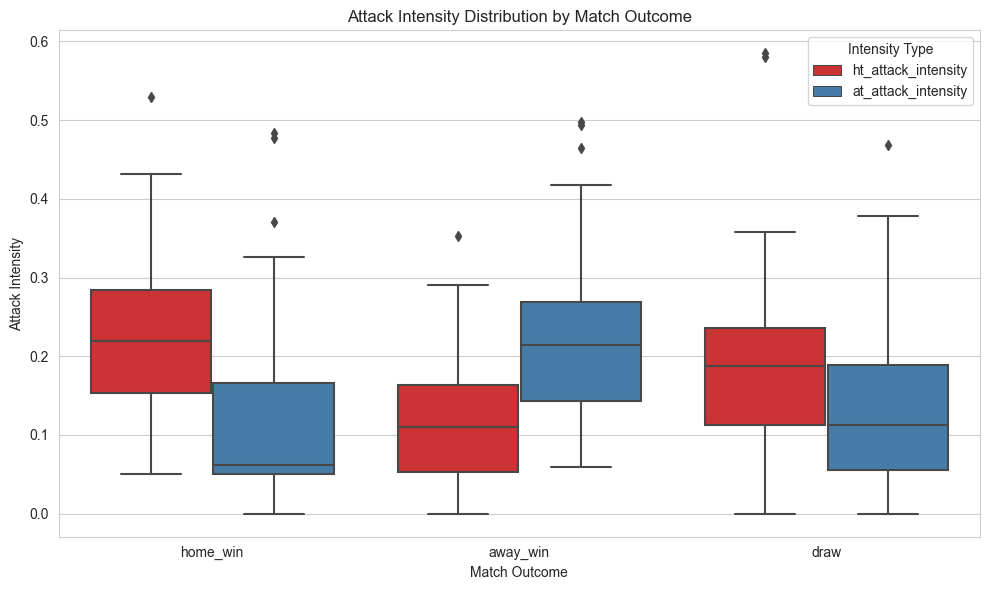

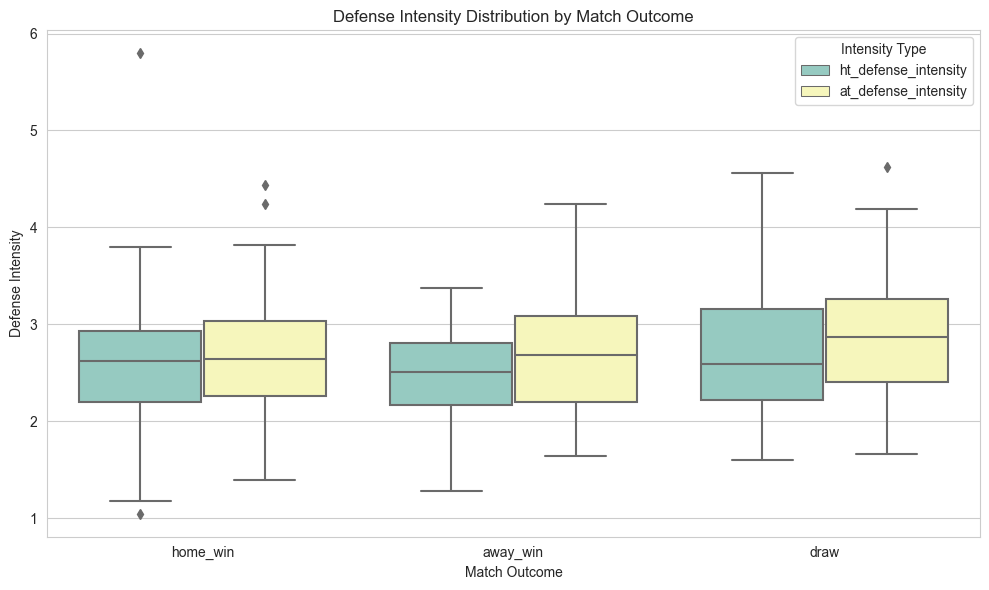

In [169]:
# Box Plot for Attack Intensities
plt.figure(figsize=(10, 6))
melted_data_attack = pd.melt(final_state_data, id_vars=['outcome'], value_vars=['ht_attack_intensity', 'at_attack_intensity'], var_name='Intensity Type', value_name='Intensity')
sns.boxplot(x='outcome', y='Intensity', hue='Intensity Type', data=melted_data_attack, palette='Set1')
plt.title('Attack Intensity Distribution by Match Outcome')
plt.xlabel('Match Outcome')
plt.ylabel('Attack Intensity')
plt.tight_layout()
plt.savefig('data_analysis/attack_intensity.png')
plt.show()

# Box Plot for Defense Intensities
plt.figure(figsize=(10, 6))
melted_data_defense = pd.melt(final_state_data, id_vars=['outcome'], value_vars=['ht_defense_intensity', 'at_defense_intensity'], var_name='Intensity Type', value_name='Intensity')
sns.boxplot(x='outcome', y='Intensity', hue='Intensity Type', data=melted_data_defense, palette='Set3')
plt.title('Defense Intensity Distribution by Match Outcome')
plt.xlabel('Match Outcome')
plt.ylabel('Defense Intensity')
plt.tight_layout()
plt.savefig('data_analysis/defense_intensity.png')
plt.show()

In [106]:
melted_data_defense.to_csv('processed_df/defense_intensity_dist.csv', index = False)
melted_data_attack.to_csv('processed_df/attack_intensity_dist.csv', index = False)

### Ball Possession Distribution

In [121]:
possession_data.to_csv('processed_df/ball_pos.csv', index= False)

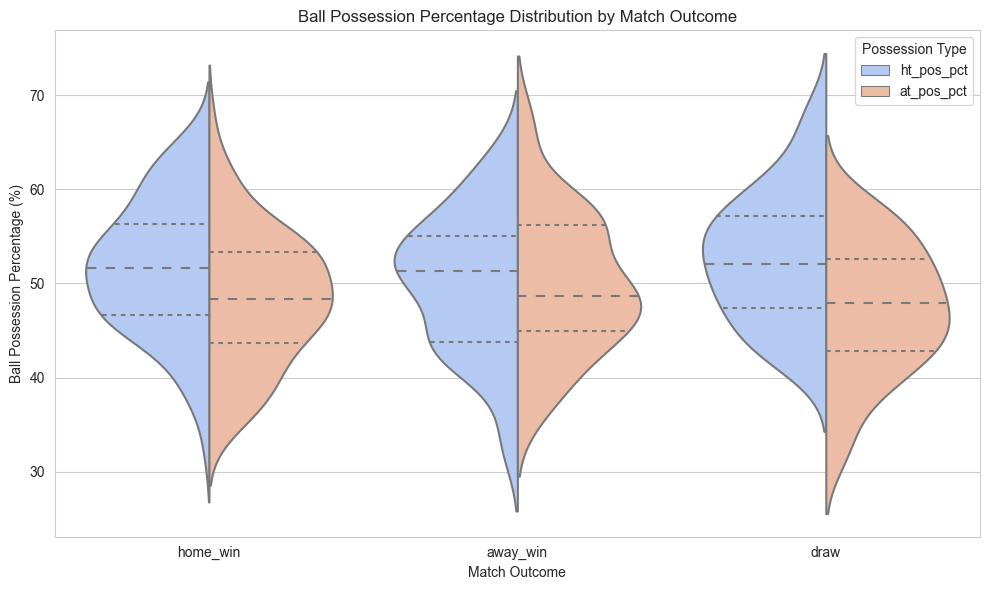

In [170]:
# Prepare the dataset for plotting ball possession
possession_data = pd.melt(final_state_data, id_vars=['outcome'], value_vars=['ht_pos_pct', 'at_pos_pct'], var_name='Possession Type', value_name='Possession Percentage')

# Plotting Ball Possession by Match Outcome
plt.figure(figsize=(10, 6))
sns.violinplot(x='outcome', y='Possession Percentage', hue='Possession Type', data=possession_data, split=True, palette='coolwarm', inner='quartile')
plt.title('Ball Possession Percentage Distribution by Match Outcome')
plt.xlabel('Match Outcome')
plt.ylabel('Ball Possession Percentage (%)')
plt.tight_layout()
plt.savefig('data_analysis/ball_pos.png')
plt.show()


### Passing Accuracy

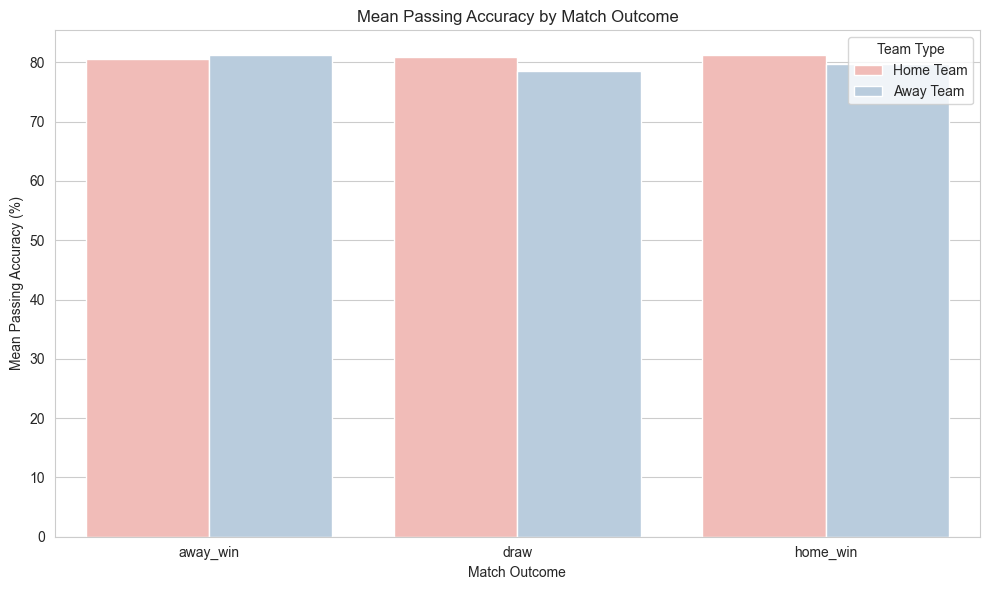

In [171]:
# Calculate mean passing accuracy for home and away teams within each outcome category
passing_accuracy_means = final_state_data.groupby('outcome').agg({'ht_pass_accuracy': 'mean', 'at_pass_accuracy': 'mean'}).reset_index()

# Melt the dataframe for easier plotting with seaborn
passing_accuracy_melted = pd.melt(passing_accuracy_means, id_vars=['outcome'], value_vars=['ht_pass_accuracy', 'at_pass_accuracy'], var_name='Team Type', value_name='Passing Accuracy')

# Mapping for nicer labels
team_type_mapping = {'ht_pass_accuracy': 'Home Team', 'at_pass_accuracy': 'Away Team'}
passing_accuracy_melted['Team Type'] = passing_accuracy_melted['Team Type'].map(team_type_mapping)

# Plotting Passing Accuracy by Match Outcome
plt.figure(figsize=(10, 6))
sns.barplot(x='outcome', y='Passing Accuracy', hue='Team Type', data=passing_accuracy_melted, palette='Pastel1')
plt.title('Mean Passing Accuracy by Match Outcome')
plt.xlabel('Match Outcome')
plt.ylabel('Mean Passing Accuracy (%)')
plt.tight_layout()
plt.savefig('data_analysis/pass_accuracy.png')
plt.show()


### Frequency of Disiplinary Actions

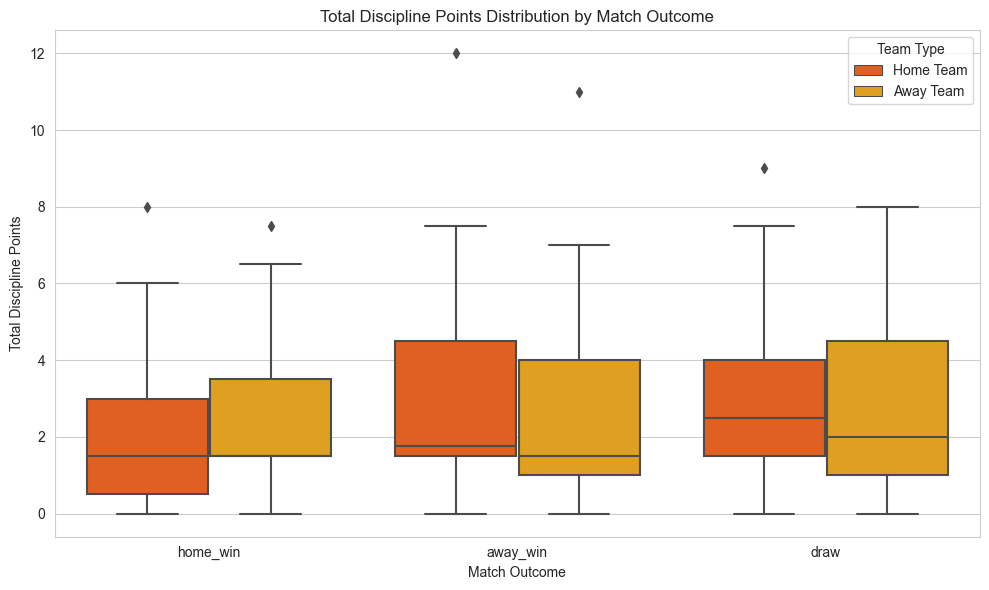

In [172]:
# Calculate Total Discipline Points for home and away teams
# Assuming: Yellow Card = 1 point, Red Card = 3 points, Other Fouls = 0.5 points each
final_state_data['ht_discipline_points'] = final_state_data['ht_yellow_cards'] + (final_state_data['ht_red_cards'] * 3) + (final_state_data['ht_other_fouls'] * 0.5)
final_state_data['at_discipline_points'] = final_state_data['at_yellow_cards'] + (final_state_data['at_red_cards'] * 3) + (final_state_data['at_other_fouls'] * 0.5)

# Melt the dataframe for easier plotting
discipline_data = pd.melt(final_state_data, id_vars=['outcome'], value_vars=['ht_discipline_points', 'at_discipline_points'], var_name='Team Type', value_name='Total Discipline Points')

# Mapping for nicer labels
team_type_mapping_discipline = {'ht_discipline_points': 'Home Team', 'at_discipline_points': 'Away Team'}
discipline_data['Team Type'] = discipline_data['Team Type'].map(team_type_mapping_discipline)

# Plotting Total Discipline Points by Match Outcome
plt.figure(figsize=(10, 6))
sns.boxplot(x='outcome', y='Total Discipline Points', hue='Team Type', data=discipline_data, palette='autumn')
plt.title('Total Discipline Points Distribution by Match Outcome')
plt.xlabel('Match Outcome')
plt.ylabel('Total Discipline Points')
plt.tight_layout()
plt.savefig('data_analysis/discipline_points.png')
plt.show()


# Time Series Analysis

### Goals and Betting

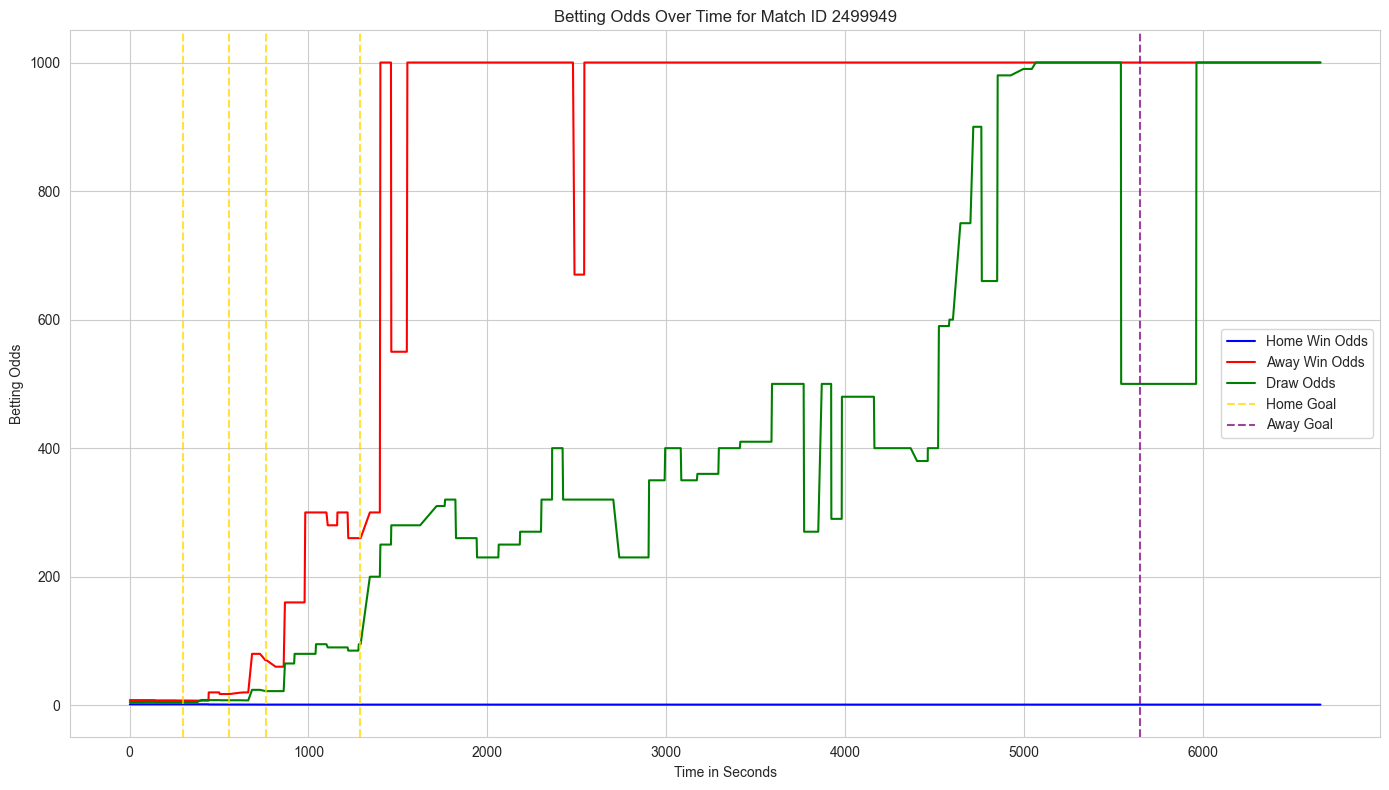

In [48]:
# Identifying moments when the home and away teams score goals
home_goals_indices = example_match_data[example_match_data['ht_goals'].diff() > 0].index
away_goals_indices = example_match_data[example_match_data['at_goals'].diff() > 0].index

# Re-plotting with differentiated goal markings for home and away teams
plt.figure(figsize=(14, 8))

# Plotting home, away, and draw prices
plt.plot(example_match_data['event_sec'], example_match_data['home_price'], label='Home Win Odds', color='blue')
plt.plot(example_match_data['event_sec'], example_match_data['away_price'], label='Away Win Odds', color='red')
plt.plot(example_match_data['event_sec'], example_match_data['draw_price'], label='Draw Odds', color='green')

# Marking home team goals
for idx in home_goals_indices:
    moment = example_match_data.loc[idx, 'event_sec']
    plt.axvline(x=moment, color='gold', linestyle='--', alpha=0.75, label='Home Goal' if idx == home_goals_indices[0] else "")

# Marking away team goals
for idx in away_goals_indices:
    moment = example_match_data.loc[idx, 'event_sec']
    plt.axvline(x=moment, color='purple', linestyle='--', alpha=0.75, label='Away Goal' if idx == away_goals_indices[0] else "")

plt.title(f'Betting Odds Over Time for Match ID {example_match_id}')
plt.xlabel('Time in Seconds')
plt.ylabel('Betting Odds')
# Ensuring the legend correctly reflects the markings
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.tight_layout()
plt.show()


### Ball Possession and Betting

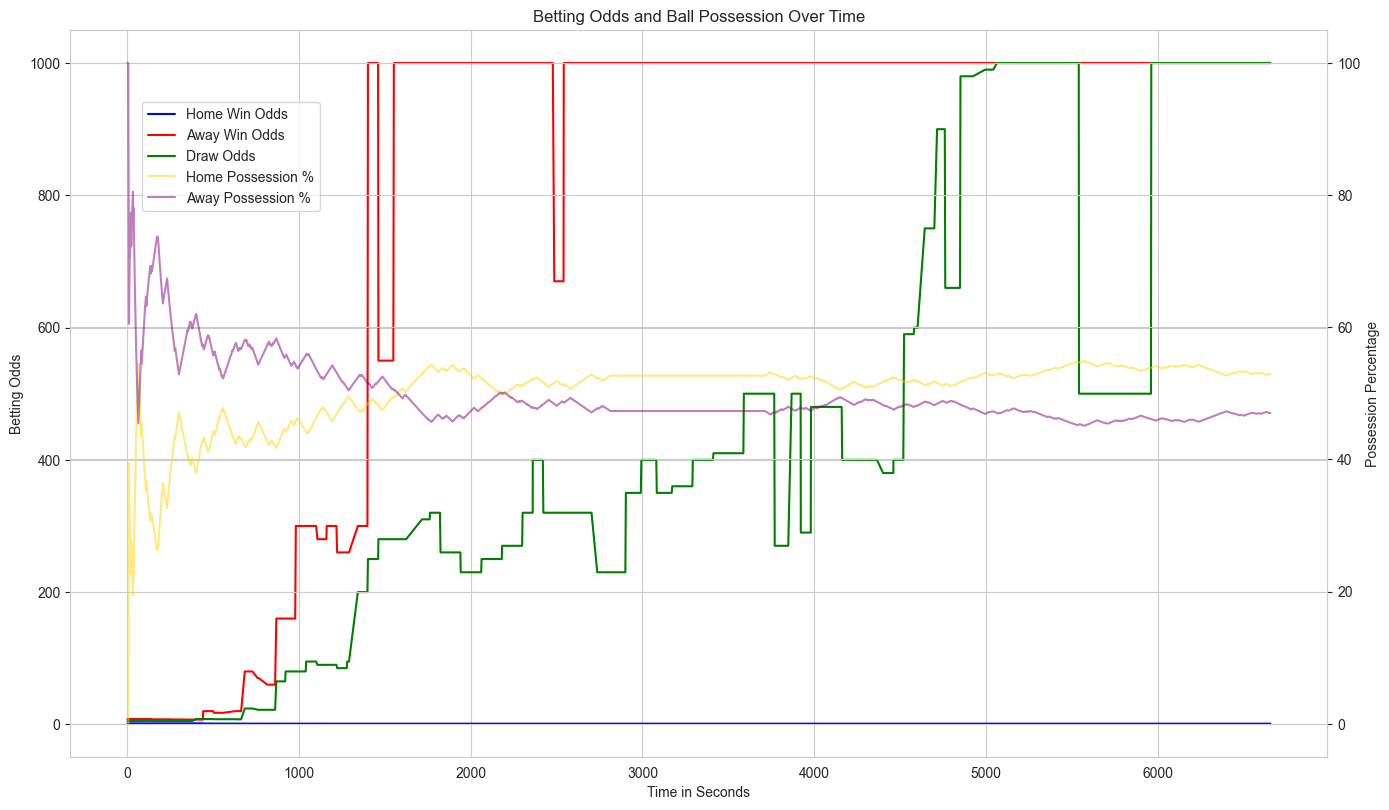

In [50]:
import matplotlib.pyplot as plt

# Assuming 'example_match_data' is your DataFrame with the selected match data
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot betting odds for all outcomes
ax1.plot(example_match_data['event_sec'], example_match_data['home_price'], label='Home Win Odds', color='blue')
ax1.plot(example_match_data['event_sec'], example_match_data['away_price'], label='Away Win Odds', color='red')
ax1.plot(example_match_data['event_sec'], example_match_data['draw_price'], label='Draw Odds', color='green')
ax1.set_xlabel('Time in Seconds')
ax1.set_ylabel('Betting Odds')

# Create a secondary axis for possession percentages
ax2 = ax1.twinx()
ax2.plot(example_match_data['event_sec'], example_match_data['ht_pos_pct'], label='Home Possession %', color='gold', alpha=0.5)
ax2.plot(example_match_data['event_sec'], example_match_data['at_pos_pct'], label='Away Possession %', color='purple', alpha=0.5)
ax2.set_ylabel('Possession Percentage')

# Finalizing the plot
fig.tight_layout()
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.title('Betting Odds and Ball Possession Over Time')
plt.show()


### Attack/Defense Intensity and Betting

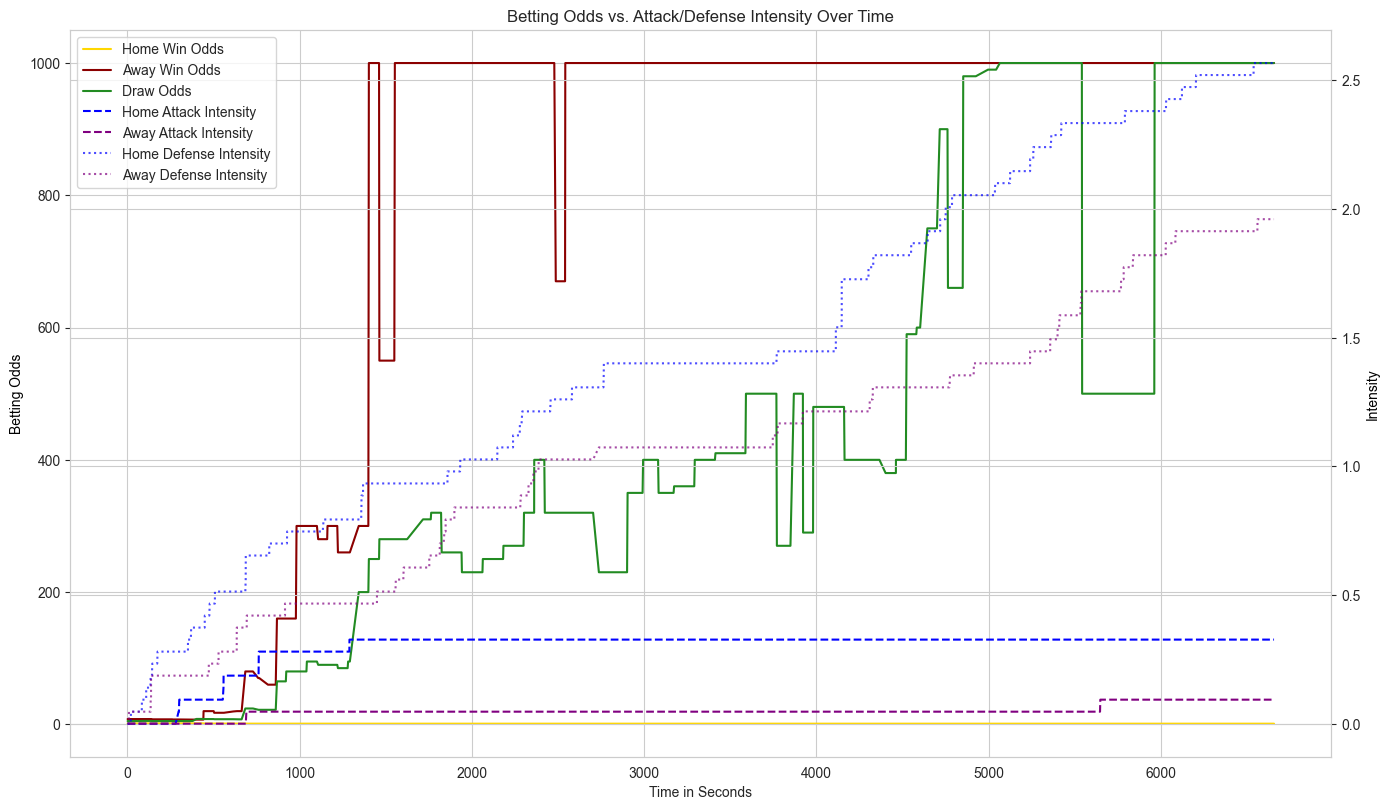

In [55]:
import matplotlib.pyplot as plt

# Assuming 'example_match_data' is your DataFrame with the selected match data
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot betting odds over time for all outcomes
ax1.plot(example_match_data['event_sec'], example_match_data['home_price'], label='Home Win Odds', color='gold')
ax1.plot(example_match_data['event_sec'], example_match_data['away_price'], label='Away Win Odds', color='darkred')
ax1.plot(example_match_data['event_sec'], example_match_data['draw_price'], label='Draw Odds', color='forestgreen')
ax1.set_xlabel('Time in Seconds')
ax1.set_ylabel('Betting Odds', color='black')

# Create a secondary axis for attack and defense intensity
ax2 = ax1.twinx()
ax2.plot(example_match_data['event_sec'], example_match_data['ht_attack_intensity'], label='Home Attack Intensity', linestyle='--', color='blue')
ax2.plot(example_match_data['event_sec'], example_match_data['at_attack_intensity'], label='Away Attack Intensity', linestyle='--', color='purple')
ax2.plot(example_match_data['event_sec'], example_match_data['ht_defense_intensity'], label='Home Defense Intensity', linestyle=':', color='blue', alpha=0.7)
ax2.plot(example_match_data['event_sec'], example_match_data['at_defense_intensity'], label='Away Defense Intensity', linestyle=':', color='purple', alpha=0.7)
ax2.set_ylabel('Intensity', color='black')

# Finalizing the plot
fig.tight_layout()
# Ensure the legend combines both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')
plt.title('Betting Odds vs. Attack/Defense Intensity Over Time')
plt.show()
